In [1]:
pip install pandas

In [2]:
!pip install numpy
!pip install matplotlib


In [3]:
!pip install scikit

ERROR: Could not find a version that satisfies the requirement scikit (from versions: none)
ERROR: No matching distribution found for scikit


[*********************100%%**********************]  1 of 1 completed


Epoch 1/15
94/94 [==============================] - 11s 42ms/step - loss: 0.0095
Epoch 2/15
94/94 [==============================] - 4s 40ms/step - loss: 0.0024
Epoch 3/15
94/94 [==============================] - 5s 51ms/step - loss: 0.0026
Epoch 4/15
94/94 [==============================] - 4s 42ms/step - loss: 0.0022
Epoch 5/15
94/94 [==============================] - 4s 41ms/step - loss: 0.0019
Epoch 6/15
94/94 [==============================] - 5s 52ms/step - loss: 0.0015
Epoch 7/15
94/94 [==============================] - 4s 41ms/step - loss: 0.0018
Epoch 8/15
94/94 [==============================] - 4s 40ms/step - loss: 0.0016
Epoch 9/15
94/94 [==============================] - 5s 52ms/step - loss: 0.0015
Epoch 10/15
94/94 [==============================] - 4s 40ms/step - loss: 0.0017
Epoch 11/15
94/94 [==============================] - 4s 40ms/step - loss: 0.0018
Epoch 12/15
94/94 [==============================] - 5s 53ms/step - loss: 0.0013
Epoch 13/15
94/94 [=================

[*********************100%%**********************]  1 of 1 completed
/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1/1 [==============================] - 2s 2s/step


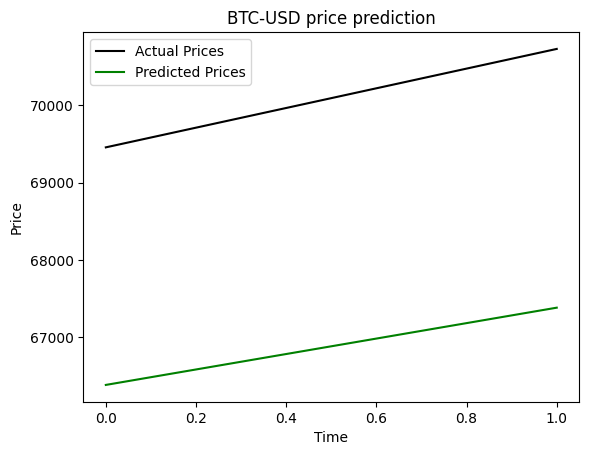

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pandas_datareader as web
import datetime as dt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.models import Sequential
import yfinance as yf

# Fetching data
crypto_currency = 'BTC-USD'
start = '2016-01-01'
end = dt.datetime.now()
data = yf.download(crypto_currency, start=start, end=end)

# Scaling data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(data['Close'].values.reshape(-1,1))

# Prepare training data
prediction_days = 30
x_train, y_train = [], []
for x in range(prediction_days, len(scaled_data)):
    x_train.append(scaled_data[x-prediction_days:x, 0])
    y_train.append(scaled_data[x, 0])

# Convert to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape data for LSTM
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

# Build the model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))
model.compile(loss='mean_squared_error', optimizer='adam')

# Train the model
model.fit(x_train, y_train, epochs=15, batch_size=32)

# Prepare test data
test_start = dt.datetime(2024, 3, 27)
test_end = dt.datetime.now()
test_data = yf.download(crypto_currency, start=test_start, end=test_end)
actual_prices = test_data['Close'].values

total_dataset = pd.concat((data['Close'], test_data['Close']), axis=0)
model_inputs = total_dataset[len(total_dataset) - len(test_data) - prediction_days:].values
model_inputs = model_inputs.reshape(-1, 1)
model_inputs = scaler.transform(model_inputs)
model.save('my_model.h5')
if len(model_inputs) < prediction_days:
    print("Insufficient data for prediction. Please ensure you have enough historical data.")
else:
    x_test = []
    for x in range(prediction_days, len(model_inputs)):
        x_test.append(model_inputs[x - prediction_days:x, 0])

    x_test = np.array(x_test)
    x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

    # Predict prices
    prediction_prices = model.predict(x_test)
    prediction_prices = scaler.inverse_transform(prediction_prices)

    # Plot actual and predicted prices
    plt.plot(actual_prices, color='black', label='Actual Prices')
    plt.plot(prediction_prices, color='green', label='Predicted Prices')
    plt.title(f'{crypto_currency} price prediction')
    plt.xlabel('Time')
    plt.ylabel('Price')
    plt.legend()
    plt.show()
    last_days = data['Close'][-prediction_days:].values
last_days_scaled = scaler.transform(last_days.reshape(-1,1))

# Reshape input data for LSTM
X_test = np.array([last_days_scaled])

# Reshape input data for LSTM
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Make prediction for the next day
predicted_prices = model.predict(X_test)

# Inverse transform the predicted prices
predicted_prices = scaler.inverse_transform(predicted_prices)
print("Next Day", ":", predicted_prices[i])



In [22]:
last_days = data['Close'][-prediction_days:].values
last_days_scaled = scaler.transform(last_days.reshape(-1,1))

# Reshape input data for LSTM
X_test = np.array([last_days_scaled])

# Reshape input data for LSTM
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Make prediction for the next day
predicted_prices = model.predict(X_test)

# Inverse transform the predicted prices
predicted_prices = scaler.inverse_transform(predicted_prices)
print("Next Day", ":", predicted_prices[i])


1/1 [==============================] - 0s 30ms/step
Next Day : [66386.484]
